In [1]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

def graficar_barras_con_imagen(porcentajes, etiquetas, modelos, ruta_imagen):
    # Ajustamos el tamaño un poco más alto para dar margen superior real
    fig, ax = plt.subplots(figsize=(14, 8))
    
    colores = plt.cm.viridis(np.linspace(0, 1, len(etiquetas))) 
    
    barras = ax.bar(etiquetas, porcentajes, color=colores, edgecolor='grey')
    
    max_valor = max(porcentajes)
    max_indice = porcentajes.index(max_valor)

    for i, barra in enumerate(barras):
        altura = barra.get_height()
        nombre_modelo = modelos[i]

        if len(nombre_modelo) > 30:
            nombre_modelo = nombre_modelo[:10] + "..."

        texto_completo = f"{nombre_modelo} - {porcentajes[i]:.3f}"
        
        # --- TEXTO ---
        ax.text(
            barra.get_x() + barra.get_width() / 2, 
            altura + 0.01, # Un pelín arriba de la barra
            texto_completo, 
            ha='center', 
            va='bottom',
            rotation=75,       
            fontsize=9,        
            fontweight='bold',
            # IMPORTANTE: clip_on=False permite que el texto se dibuje 
            # aunque se salga del techo del gráfico (y=1)
            clip_on=False 
        )

        # --- IMAGEN ---
        if i == max_indice:
            try:
                arr_img = plt.imread(ruta_imagen)
                imagebox = OffsetImage(arr_img, zoom=0.03) 
                
                ab = AnnotationBbox(
                    imagebox, 
                    (i, altura),
                    # Subimos 130 puntos. Como el eje acaba en 1, esto flotará fuera del gráfico
                    xybox=(0, 100), 
                    xycoords='data',
                    boxcoords="offset points",
                    frameon=False,
                    box_alignment=(0.5, 0),
                    # IMPORTANTE: clip_on=False evita que la imagen desaparezca al cruzar y=1
                    clip_on=False 
                )
                ax.add_artist(ab)
            except FileNotFoundError:
                pass 

    # --- EJE Y LIMITE 1 ---
    ax.set_ylim(0, 1)
    ax.set_ylabel('Accuracy / Score')

    # --- TITULO ---
    # pad=90: Empujamos el título MUY arriba porque ahora el texto y la imagen
    # están viviendo en el espacio vacío entre el eje y el título.
    ax.set_title('Resultados del Torneo - RoBERTuito', fontsize=16, fontweight='bold', pad=100)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.xticks(rotation=45, ha='right', fontsize=9)

    plt.tight_layout() 
    plt.savefig('generales.pdf')
    plt.show()


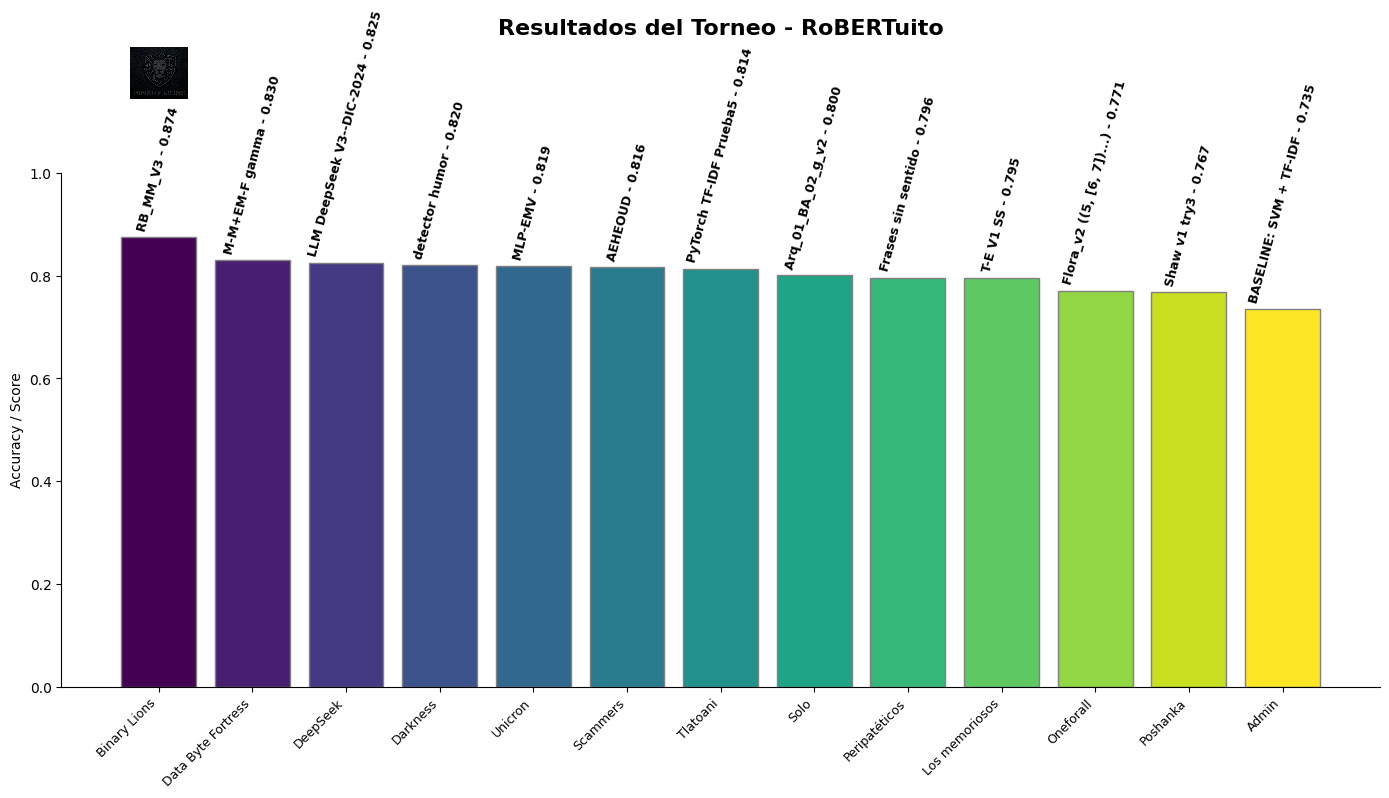

In [2]:

# --- DATOS ---
mis_datos = [0.8744, 0.8295, 0.8246, 0.8199, 0.8189, 0.8162, 0.8138,0.8005,0.7958,0.7948, 0.7711, 0.7675, 0.735]
mis_etiquetas = ['Binary Lions', 'Data Byte Fortress', 'DeepSeek', 'Darkness', 'Unicron', 'Scammers', 'Tlatoani', 'Solo', 'Peripatéticos', 'Los memoriosos', 'Oneforall', 'Poshanka', 'Admin']
modelos = ['RB_MM_V3', 'M-M+EM-F gamma', 'LLM DeepSeek V3--DIC-2024','detector humor', 'MLP-EMV', 'AEHEOUD', 'PyTorch TF-IDF Prueba5', 'Arq_01_BA_02_g_v2', 'Frases sin sentido', 'T-E V1 SS', 'Flora_v2 ((5, [6, 7])...)', 'Shaw v1 try3', 'BASELINE: SVM + TF-IDF']

# CORRECCIÓN EN LA LLAMADA: Ahora pasamos los 4 argumentos (incluyendo 'modelos')
graficar_barras_con_imagen(mis_datos, mis_etiquetas, modelos, 'logo.png')